### EN2550 - ASSIGNMENT 01
#### 190713X - L.H.N. WIJEWARDENA

#### Question 1

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

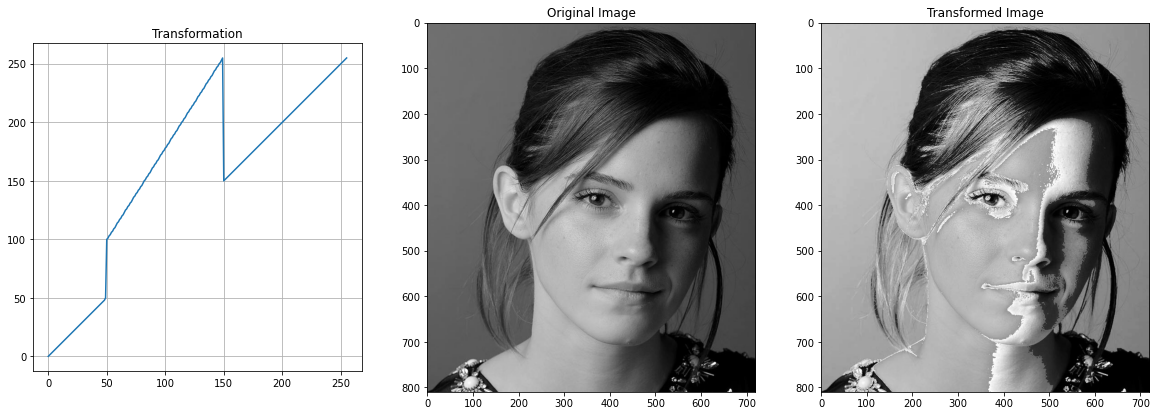

In [3]:
old = cv.imread(r"emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert old is not None
#transformation
t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#plotting
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(t)
ax[0].set_title("Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(t) == 256
g = cv.LUT(old,t)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()


#### Question 2
a) - White matter

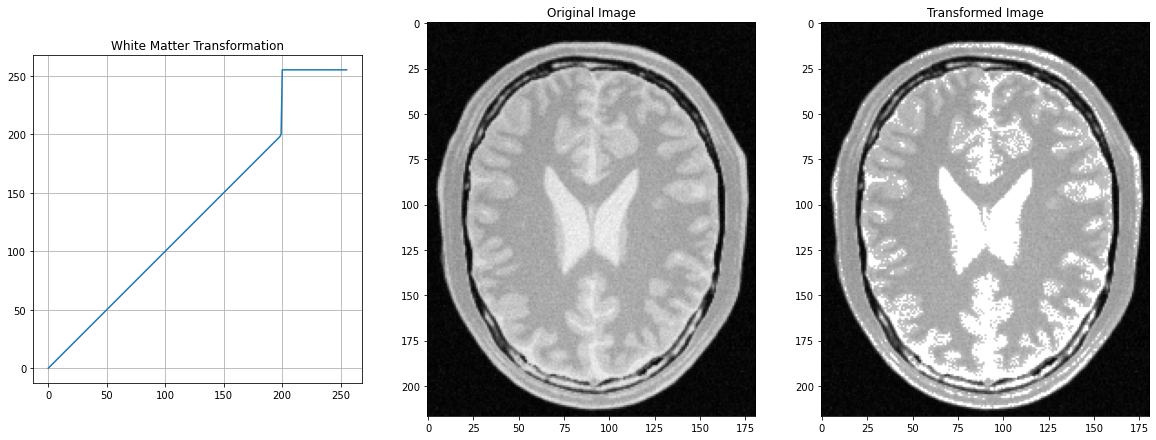

In [4]:
old = cv.imread(r"brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

#transformation
tw_1=np.linspace(0,200,200)
tw_2=np.linspace(255,255,56)


tw = np.concatenate((tw_1,tw_2),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tw)
ax[0].set_title("White Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tw) == 256
g = cv.LUT(old,tw)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()



b) - Gray Matter

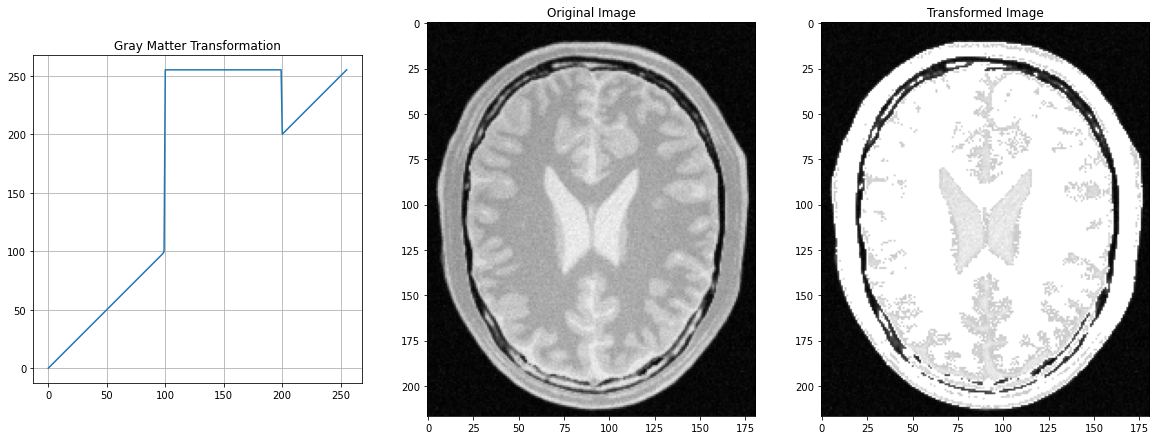

In [5]:
old = cv.imread(r"brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

#transformation
tb_1=np.linspace(0,100,100)
tb_2=np.linspace(255,255,100)
tb_3=np.linspace(200,255,56)

tb = np.concatenate((tb_1,tb_2,tb_3),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tb)
ax[0].set_title("Gray Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tb) == 256
g = cv.LUT(old,tb)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()

#### Question 3
##### a) - Gamma correction to L plane
##### b) - Histograms of the original and corrected images

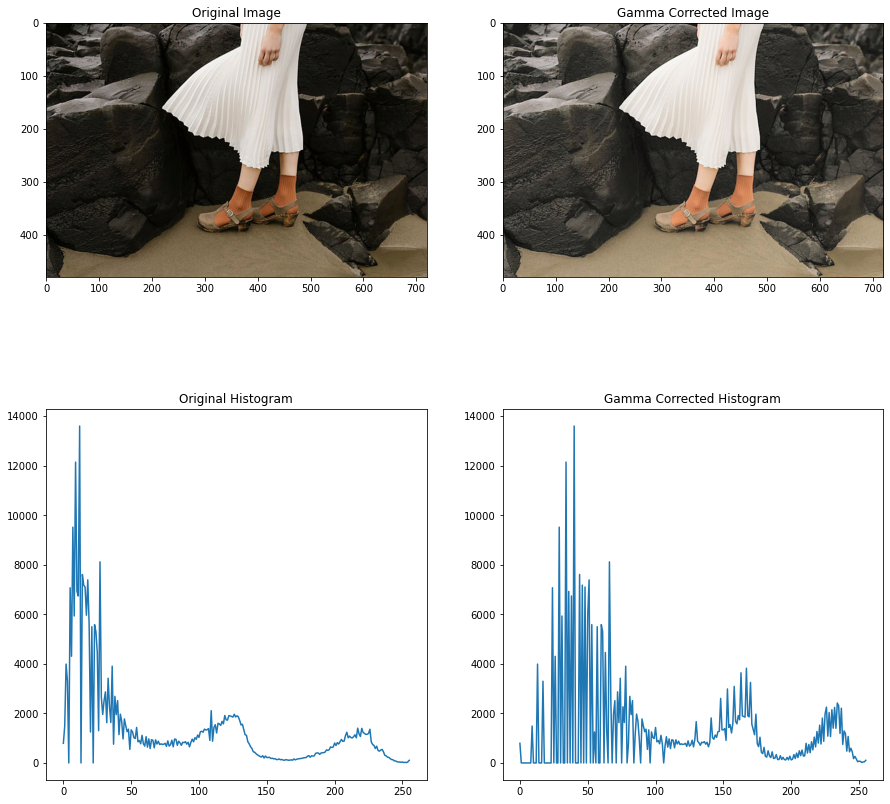

In [6]:
img = cv.imread(r"highlights_and_shadows.jpg", cv.IMREAD_ANYCOLOR)
assert img is not None

# Convert to L*a*b* color space
img = cv.cvtColor(img, cv.COLOR_BGR2Lab)

gamma = 0.6
# Apply gamma correction
tw = np.array([(i/255)**gamma*255 for i in range(256)]).astype(np.uint8)
Lfield = cv.LUT(img[:,:,0],tw).reshape(480,720,1) # Applying Gamma correction to only the L field
corrected = np.concatenate([Lfield,img[:,:,1:]],-1) # Reconstruct the image

# Plot the original and the transfromed image
fig,ax = plt.subplots(2,2,figsize = (15,15))

ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_Lab2RGB))
ax[0][0].set_title("Original Image")
ax[0][1].imshow(cv.cvtColor(corrected, cv.COLOR_Lab2RGB))
ax[0][1].set_title("Gamma Corrected Image")

# Original Histogram
Ohistogram = cv.calcHist([img],[0],None,[256],[0,256])
ax[1][0].plot(Ohistogram)
ax[1][0].set_title("Original Histogram")

# Corrected Histogram
Chistogram= cv.calcHist([corrected],[0],None,[256],[0,256])
ax[1][1].plot(Chistogram)
ax[1][1].set_title("Gamma Corrected Histogram")
plt.show()

#### Question 4

In [8]:
def histeq(img):
    #calculate the histogram of the original image
    hist =  cv.calcHist([img],[0],None,[256],[0,256])
    #Get the cumulative sum of the histogram 
    cdf=hist.cumsum()
    #Creating the equalized Histogram by normalizing the values between 0-255
    sk = np.uint8(255 * (cdf-np.min(cdf))/(np.max(cdf)-np.min(cdf)))
    s1, s2 = img.shape
    Y = np.zeros_like(img)  
    #applying the equalized histogram values to the original image
    for i in range(0, s1):
	    for j in range(0, s2):
		    Y[i, j] = sk[img[i, j]] 
    return Y  # return the equalized image

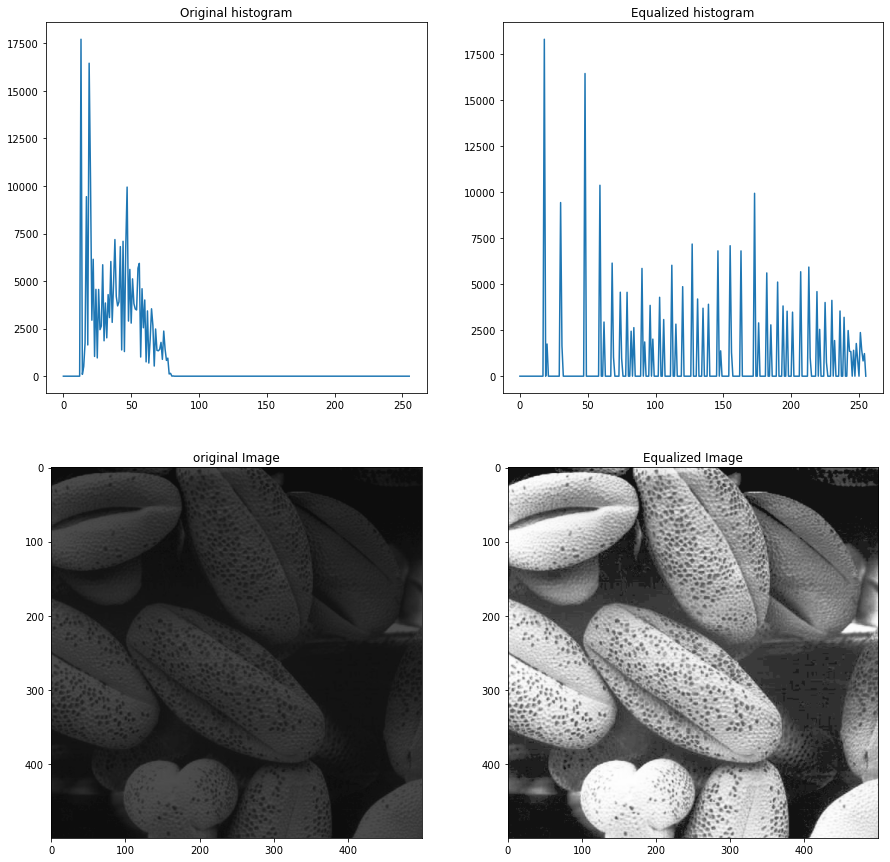

In [9]:
first = cv . imread ( r"shells.png", cv . IMREAD_GRAYSCALE )
assert first is not None


hist_f = cv.calcHist([first],[0],None,[256],[0,256])
equalized=histeq(first) 
hist_e=  cv.calcHist([equalized],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0][0].plot(hist_f)
ax[0][0].set_title("Original histogram")
ax[0][1].plot(hist_e)
ax[0][1].set_title("Equalized histogram")

fplot = cv.cvtColor(first, cv.COLOR_BGR2RGB)
ax[1][0].imshow(fplot)
ax[1][0].set_title("original Image")


gplot = cv.cvtColor(equalized, cv.COLOR_BGR2RGB)
ax[1][1].imshow(gplot)
ax[1][1].set_title("Equalized Image")

plt.show()

#### Question 5
a) - Nearest Neighbour

In [10]:
def nearest_Neighbour(img,scale):
    #rows = no. of rows in the original image x scale
    rows = int(scale*img.shape[0])  
    #columns = no. of columns in the original image x scale
    columns = int(scale*img.shape[1])
    # no of channels are equal in both images
    channels = img.shape[2]
    zoomed = np.zeros((rows,columns,channels),dtype=img.dtype)
    # assigning the value of the nearest neighbor to the zoomed image pixels
    for c in range(0,channels):
        for i in range(0,rows):
            for j in range(0,columns):
                zoomed[i,j,c]=img[int(i/scale),int(j/scale),c]
    return zoomed

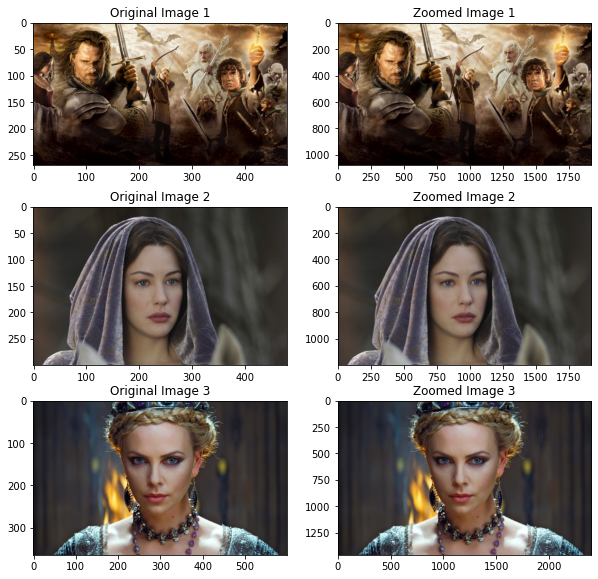

In [12]:
img1= cv.imread(r"a1q5images\im01small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img1 is not None
img2= cv.imread(r"a1q5images\im02small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img2 is not None
img3= cv.imread(r"a1q5images\im03small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img3 is not None

zoomed1 = nearest_Neighbour(img1,4)
zoomed2 = nearest_Neighbour(img2,4)
zoomed3 = nearest_Neighbour(img3,4)

fig,ax = plt.subplots(3,2,figsize=(10,10))

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
zoomed1 = cv.cvtColor(zoomed1,cv.COLOR_BGR2RGB)
ax[0][0].imshow(img1)
ax[0][0].set_title("Original Image 1")
ax[0][1].imshow(zoomed1)
ax[0][1].set_title("Zoomed Image 1")

img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
zoomed2 = cv.cvtColor(zoomed2,cv.COLOR_BGR2RGB)
ax[1][0].imshow(img2)
ax[1][0].set_title("Original Image 2")
ax[1][1].imshow(zoomed2)
ax[1][1].set_title("Zoomed Image 2")

img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
zoomed3 = cv.cvtColor(zoomed3,cv.COLOR_BGR2RGB)
ax[2][0].imshow(img3)
ax[2][0].set_title("Original Image 3")
ax[2][1].imshow(zoomed3)
ax[2][1].set_title("Zoomed Image 3")


plt.show()

In [13]:
imgL1= cv.imread(r"a1q5images\im01.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL1 is not None
imgL2= cv.imread(r"a1q5images\im02.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL2 is not None
imgL3= cv.imread(r"a1q5images\im03.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL3 is not None

#calculating SSD
ssd_1 = np.sum(((imgL1[:,:]-zoomed1[:,:])**2)/(3*255**2))/(imgL1.shape[0]*imgL1.shape[1])
ssd_2 = np.sum(((imgL2[:,:]-zoomed2[:,:])**2)/(3*255**2))/(imgL2.shape[0]*imgL2.shape[1])

print("SSD for Image 1:", ssd_1)
print("SSD for Image 2:", ssd_2)


SSD for Image 1: 0.001292024093890763
SSD for Image 2: 0.0007839188275164825


b) - Bilinear Interpolation

In [16]:
def bilinear_interpolation(img,scale):
    #rows = no. of rows in the original image x scale
    rows = int(scale*img.shape[0])
    #columns = no. of columns in the original image x scale
    columns = int(scale*img.shape[1])
    zoomed = cv.resize(img,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

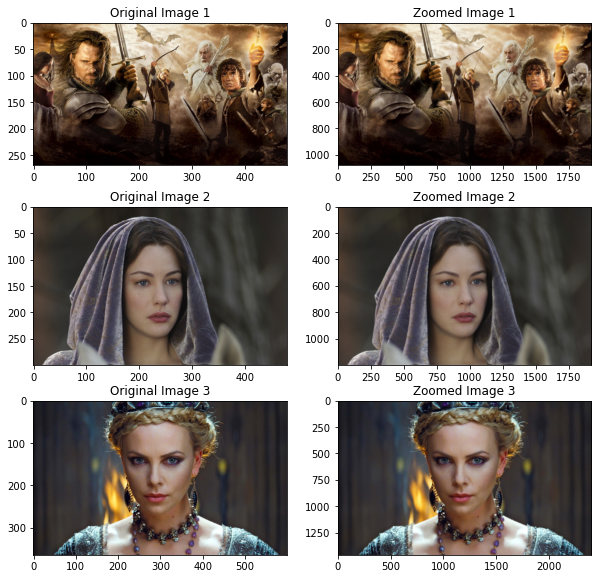

In [17]:
img1= cv.imread(r"a1q5images\im01small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img1 is not None
img2= cv.imread(r"a1q5images\im02small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img2 is not None
img3= cv.imread(r"a1q5images\im03small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img3 is not None

zoomedB1 = bilinear_interpolation(img1,4)
zoomedB2 = bilinear_interpolation(img2,4)
zoomedB3 = bilinear_interpolation(img3,4)

fig,ax = plt.subplots(3,2,figsize=(10,10))

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
zoomedB1 = cv.cvtColor(zoomedB1,cv.COLOR_BGR2RGB)
ax[0][0].imshow(img1)
ax[0][0].set_title("Original Image 1")
ax[0][1].imshow(zoomedB1)
ax[0][1].set_title("Zoomed Image 1")

img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
zoomedB2 = cv.cvtColor(zoomedB2,cv.COLOR_BGR2RGB)
ax[1][0].imshow(img2)
ax[1][0].set_title("Original Image 2")
ax[1][1].imshow(zoomedB2)
ax[1][1].set_title("Zoomed Image 2")

img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
zoomedB3 = cv.cvtColor(zoomedB3,cv.COLOR_BGR2RGB)
ax[2][0].imshow(img3)
ax[2][0].set_title("Original Image 3")
ax[2][1].imshow(zoomedB3)
ax[2][1].set_title("Zoomed Image 3")


plt.show()

In [18]:
imgL1= cv.imread(r"a1q5images\im01.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL1 is not None
imgL2= cv.imread(r"a1q5images\im02.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL2 is not None
imgL3= cv.imread(r"a1q5images\im03.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert imgL3 is not None

#calculating SSD
ssdB_1 = np.sum(((imgL1[:,:]-zoomedB1[:,:])**2)/(3*255**2))/(imgL1.shape[0]*imgL1.shape[1])
ssdB_2 = np.sum(((imgL2[:,:]-zoomedB2[:,:])**2)/(3*255**2))/(imgL2.shape[0]*imgL2.shape[1])

print("SSD for Image 1:", ssdB_1)
print("SSD for Image 2:", ssdB_2)

SSD for Image 1: 0.0012918252125448735
SSD for Image 2: 0.0007750037134043885


#### Question 6
a) - Using filter 2D

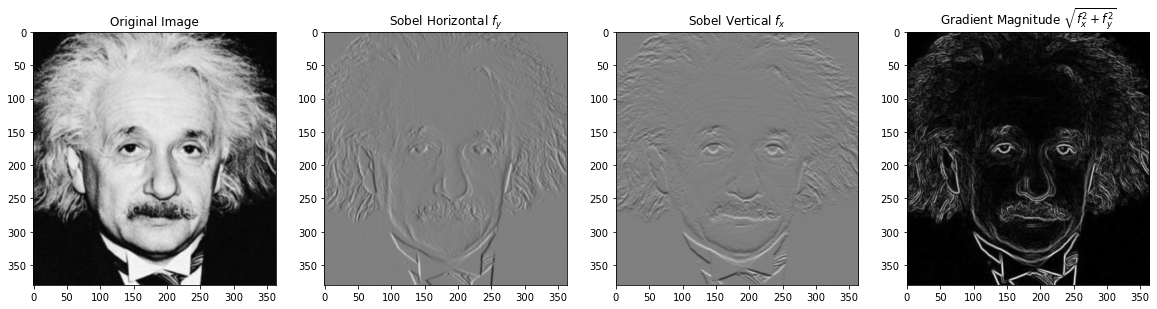

In [39]:
f= cv.imread(r"einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
#sobel kernels
sobel_v=  np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=float)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=float)

f_y= cv.filter2D(f , -1 , sobel_h)
f_x= cv.filter2D(f , -1 , sobel_v)
#Calculating Gradient magnitude
grad_mag = np.sqrt(f_x**2 + f_y**2)

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(f, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(f_y, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

ax[2].imshow(f_x, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical $f_x$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()

b) - Function for sobel filtering

In [20]:
def convolution2d(image, kernel):
    # get the no.of rows and columns in the kernel
    m, n = np.shape(kernel)
     # get the no.of rows and columns in the image
    x, y = np.shape(image)
    #pad the borders of the image with 0's
    newimage=np.pad(image, ((m//2, m//2), (n//2, n//2)),'constant', constant_values=(0,0) )
    out_image = np.zeros((np.shape(image)))
    #flipping the kernel
    kernel = np.flipud(np.fliplr(kernel))
    #Convolving the image pixels with the kernel
    for i in range(y):
        for j in range(x):
            out_image[j][i] =  np.sum(newimage[j:j+m, i:i+n]*kernel) 
   
    return out_image

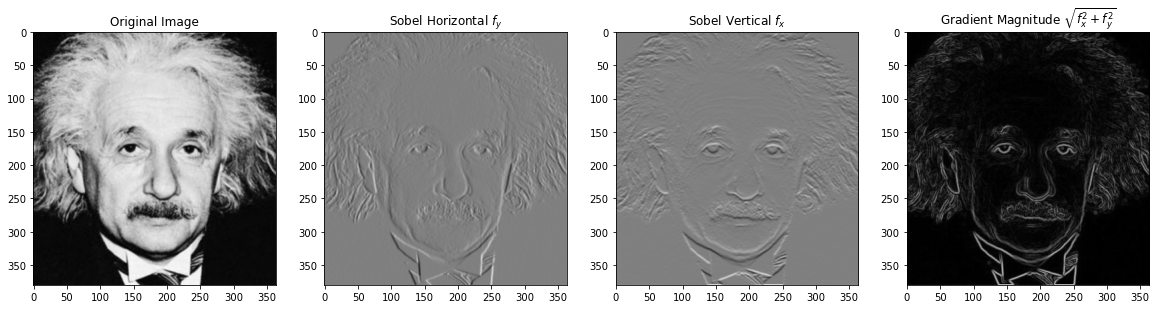

In [40]:
f= cv.imread(r"einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v=  np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=float)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=float)

#convolution function
f_y= convolution2d(f,sobel_h)
f_x= convolution2d(f,sobel_v)

grad_mag = np.sqrt(f_x**2 + f_y**2)

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(f, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(f_y, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

ax[2].imshow(f_x, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical $f_x$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()

c) - Using Matrix Multiplication (Seperable Convolutions)

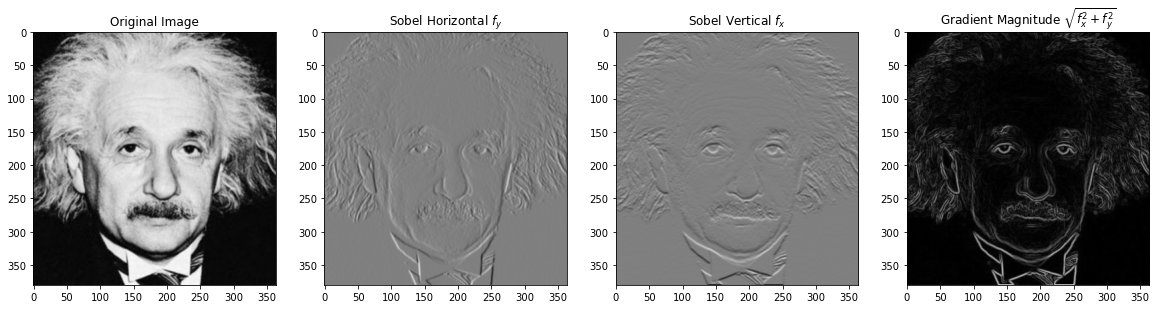

In [21]:
f= cv.imread(r"einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
#horizontal kernel as a two matrices
sobelh1 = np.array([[1],[2],[1]])
sobelh2 = np.array([[1,0,-1]])
#vertical kernel as two matrices
sobelv1 = np.array([[1],[0],[-1]])
sobelv2 = np.array([[1,2,1]])
# using seperable convolutions
fy= convolution2d(f,sobelh1)
fyy= convolution2d(fy , sobelh2)

fx= convolution2d(f,sobelv1)
fxx= convolution2d(fx , sobelv2)
#calculating the gradient magnitude
grad_mag = np.sqrt(fxx**2 + fyy**2)

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(f, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(fyy, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

ax[2].imshow(fxx, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical $f_x$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()

#### Question 7
a) - Using Grabcut to segment Images

(841, 561, 3)


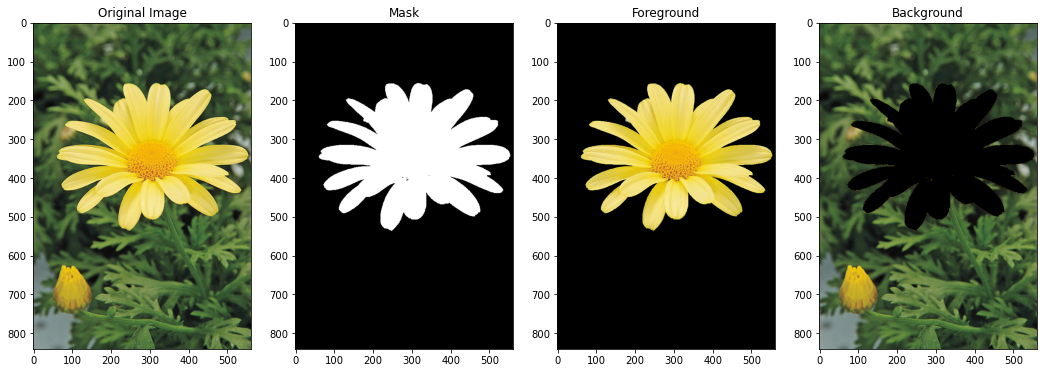

In [22]:
img = cv.imread(r"daisy.jpg", cv.IMREAD_ANYCOLOR)
assert img is not None
print(img.shape)
mask = np.zeros(img.shape[:2], dtype="uint8")
 # Defining the rectangle that contains the object
rect = (30, 100, 560, 500)

fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")

# Apply GrabCut using the the bounding box segmentation method
(mask, bgModel, fgModel) = cv.grabCut(img, mask, rect, bgModel, fgModel, 8, mode=cv.GC_INIT_WITH_RECT)

# applying mask to the foreground
fmask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
foutputMask= (np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1)*255).astype(np.uint8)
foreground = cv.bitwise_and(img, img, mask=foutputMask) # Foreground Image

#applying mask to the background background
bmask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
boutputMask = (np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)*255).astype(np.uint8)
background = cv.bitwise_and(img, img, mask=boutputMask) # Background Image

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(fmask, cv.COLOR_BGR2RGB))
ax[1].set_title("Mask")
ax[2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[3].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")

plt.show()

b) - Enhanced Image with blurred background

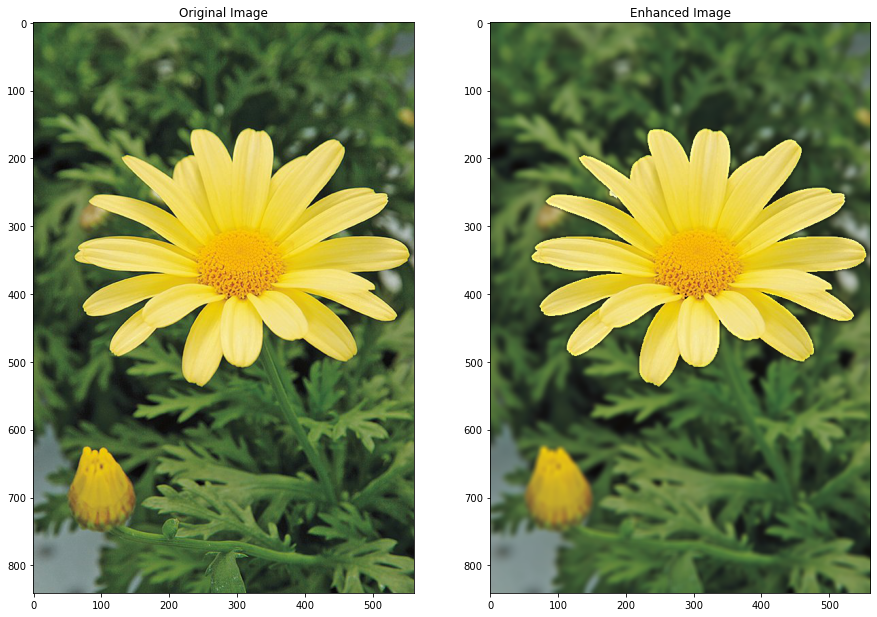

In [23]:
backgroundBlur =cv.GaussianBlur(background, (9,9), 4) 
enhanced = cv.add(foreground, backgroundBlur)

fig,ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")

plt.show()

c) - Reasons for the  background just beyond the edge of the being flower quite dark in the enhanced image

When performing grabCut there is a probability of the pixels around the edges to belong to both foreground and the background. 
Therefore, when the two images are added, those pixels at the edge are added together and clipped below 255 and because of that they can appear dark.